In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [2]:
#importing the dataset
df = pd.read_csv(r'/home/rguktongole/Downloads/Unemployment_Rate_upto_11_2020.csv')

In [3]:
#exploratory data analysis
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate (%),267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [9]:
#removing the leading and trailing spaces from the columns
df = df.rename(columns={' Date': 'Date',' Frequency':'Frequency',
                        ' Estimated Unemployment Rate (%)':'EstimatedUnemploymentRate',
                        ' Estimated Employed':'EstimatedEmployed',
                        ' Estimated Labour Participation Rate (%)':'EstimatedLabourParticipationRate(%)',
                       'Region.1':'Direction'})


In [10]:
#checking for the removal of the leading and trailing space from the dataframe
df.head(1)

,Region,Date,Frequency,EstimatedUnemploymentRate,EstimatedEmployed,EstimatedLabourParticipationRate(%),Direction,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74


In [11]:
#changing the data type of date column
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 267 entries, 0 to 266
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
267 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.2 KB


In [13]:
df['Date'].max()

Timestamp('2020-10-31 00:00:00')

In [14]:
df['Date'].min()

Timestamp('2020-01-31 00:00:00')

In [15]:
#separing the date column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day 

In [16]:
df.head(3)

,Region,Date,Frequency,EstimatedUnemploymentRate,EstimatedEmployed,EstimatedLabourParticipationRate(%),Direction,longitude,latitude,year,month,day
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,2020,1,31
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2020,2,29
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,2020,3,31


In [17]:
df['year'].value_counts()

2020    267
Name: year, dtype: int64

In [18]:
df['month'].value_counts()

3     27
5     27
6     27
7     27
8     27
9     27
10    27
1     26
2     26
4     26
Name: month, dtype: int64

In [19]:
#replacing the month values to its names
df.replace({'month':{1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october'}},inplace=True)

In [20]:
df.head(5)

,Region,Date,Frequency,EstimatedUnemploymentRate,EstimatedEmployed,EstimatedLabourParticipationRate(%),Direction,longitude,latitude,year,month,day
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,2020,january,31
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2020,february,29
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,2020,march,31
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,2020,april,30
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,2020,may,31


In [21]:
df.columns

Index(['Region', 'Date', 'Frequency', 'EstimatedUnemploymentRate',
       'EstimatedEmployed', 'EstimatedLabourParticipationRate(%)', 'Direction',
       'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

In [43]:
fg = df['Direction'].value_counts()
fd = fg.values
gh = fg.index
dc = px.pie(df,values=fd,names=gh,hole=0.9)
dc.update_layout(width=500,height=400,title='Information about the regions based on the direction')
dc.show()

In [44]:
fg = df['Region'].value_counts()
fd = fg.values
gh = fg.index
dc = px.pie(df,values=fd,names=gh,hole=0.4)
dc.update_layout(width=500,height=400,title='Information about the Region')
dc.show()

In [24]:
df.columns

Index(['Region', 'Date', 'Frequency', 'EstimatedUnemploymentRate',
       'EstimatedEmployed', 'EstimatedLabourParticipationRate(%)', 'Direction',
       'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

In [25]:
fg = df['month'].value_counts()
fd = fg.values
gh = fg.index
dc = px.pie(df,values=fd,names=gh,hole=0.5)
dc.update_layout(width=500,height=400,title='Information about the month')
dc.show()

In [26]:
fg = df['year'].value_counts()
fd = fg.values
gh = fg.index
dc = px.pie(df,values=fd,names=gh,hole=0.5)
dc.update_layout(width=500,height=400,title='Information about the year')
dc.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chhattisgarh'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Goa'),
  Text(6, 0, 'Gujarat'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Himachal Pradesh'),
  Text(9, 0, 'Jammu & Kashmir'),
  Text(10, 0, 'Jharkhand'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Madhya Pradesh'),
  Text(14, 0, 'Maharashtra'),
  Text(15, 0, 'Meghalaya'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana'),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

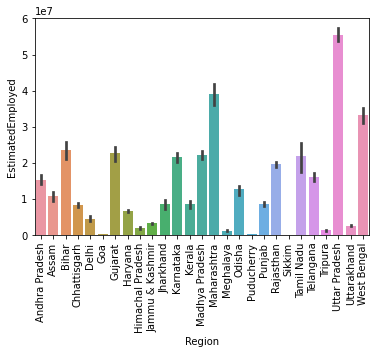

In [27]:
#graph between the region and estimated employed persons
sns.barplot(x='Region',y='EstimatedEmployed',data=df)
plt.xticks(rotation=90)

In [28]:
df.columns

Index(['Region', 'Date', 'Frequency', 'EstimatedUnemploymentRate',
       'EstimatedEmployed', 'EstimatedLabourParticipationRate(%)', 'Direction',
       'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'january'),
  Text(1, 0, 'february'),
  Text(2, 0, 'march'),
  Text(3, 0, 'april'),
  Text(4, 0, 'may'),
  Text(5, 0, 'june'),
  Text(6, 0, 'july'),
  Text(7, 0, 'august'),
  Text(8, 0, 'september'),
  Text(9, 0, 'october')])

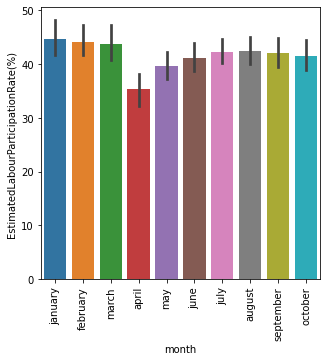

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(x='month',y='EstimatedLabourParticipationRate(%)',data=df)
plt.xticks(rotation=90)

In [30]:
df.columns

Index(['Region', 'Date', 'Frequency', 'EstimatedUnemploymentRate',
       'EstimatedEmployed', 'EstimatedLabourParticipationRate(%)', 'Direction',
       'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'january'),
  Text(1, 0, 'february'),
  Text(2, 0, 'march'),
  Text(3, 0, 'april'),
  Text(4, 0, 'may'),
  Text(5, 0, 'june'),
  Text(6, 0, 'july'),
  Text(7, 0, 'august'),
  Text(8, 0, 'september'),
  Text(9, 0, 'october')])

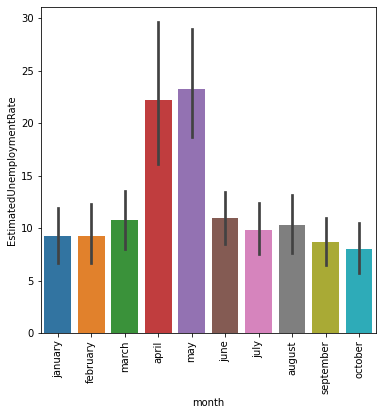

In [31]:
plt.figure(figsize=(6,6))
sns.barplot(x='month',y='EstimatedUnemploymentRate',data=df)
plt.xticks(rotation=90)

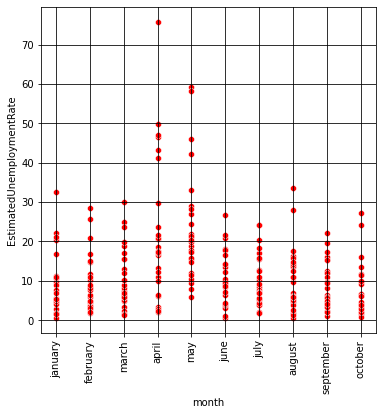

In [32]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='month',y='EstimatedUnemploymentRate',data=df,color='red')
plt.xticks(rotation=90)
plt.grid(color='black')

In [33]:
df.columns

Index(['Region', 'Date', 'Frequency', 'EstimatedUnemploymentRate',
       'EstimatedEmployed', 'EstimatedLabourParticipationRate(%)', 'Direction',
       'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

In [34]:
fig = px.bar(x=df['Region'],y=df['EstimatedUnemploymentRate'])
fig.show()

In [35]:
df.columns

Index(['Region', 'Date', 'Frequency', 'EstimatedUnemploymentRate',
       'EstimatedEmployed', 'EstimatedLabourParticipationRate(%)', 'Direction',
       'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

In [36]:
fig = px.scatter_geo(df,lat='latitude', lon='longitude', color='Region',
                     hover_name='Region',size='EstimatedUnemploymentRate',animation_frame='month',scope='world',
                     title='Earthquakes Around the World')
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =3000
fig.update_geos(lataxis_range=[1,100],lonaxis_range=[105,200],oceancolor='lightgrey',showocean=True)
fig.show()

In [38]:
#  ['africa', 'asia', 'europe', 'north america', 'south
#             america', 'usa', 'world']


In [39]:
import plotly.graph_objects as go
# Example data
locations = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami']
latitudes = [40.7128, 34.0522, 41.8781, 29.7604, 25.7617]
longitudes = [-74.0060, -118.2437, -87.6298, -95.3698, -80.1918]
values = [100, 200, 50, 150, 75]


In [40]:
trace = go.Scattergeo(
    locationmode='USA-states',  # Specify the location mode (e.g., USA states)
    lon=longitudes,            # Longitude data
    lat=latitudes,             # Latitude data
    text=locations,            # Text to display when hovering over points
    mode='markers',            # Display points as markers
    marker=dict(
        size=values,            # Marker size based on some data
        color='blue',           # Marker color
        opacity=0.7             # Marker opacity
    )
)

In [41]:
layout = go.Layout(
    title='Scatter Geo Plot',
    geo=dict(
        scope='usa',  # Set the scope of the map (e.g., 'usa', 'world', etc.)
    )
)

In [42]:
fig = go.Figure(data=[trace], layout=layout)
fig.show()